In [1]:
import gymnasium
import os
import shutil
import matplotlib.pyplot as plt
from torch.utils.tensorboard import SummaryWriter
import torch
from agents import A2C_Continious_Action_Replay_Buffer_V3
from src.utils import plot_rewards
from src.networks import CriticFunction, ActorFunction_Continious

### Environment

In [4]:
env = gymnasium.make("BipedalWalker-v3")

In [5]:
env_name = 'bipedal_walker'

lr = 1e-3

In [6]:
a2c_agent = A2C_Continious_Action_Replay_Buffer_V3(env, env_name, ActorFunction_Continious, CriticFunction, 
                                      lr_actor = lr, lr_value_critic = lr, 
                                      discount_factor = 0.99, convergence_value = 300, convergence_len = 5)

In [7]:
folder_path = f'logs/{env_name}'
if os.path.exists(folder_path):
    # Remove the folder
    shutil.rmtree(folder_path)
    print(f"Folder '{folder_path}' deleted successfully.")
else:
    print(f"Folder '{folder_path}' does not exist.")

Folder 'logs/assignment3_part2_bipedal_walker' deleted successfully.


In [8]:
writer = SummaryWriter(log_dir=f'logs/{env_name}')

In [ ]:
a2c_agent.train(1700, writer)

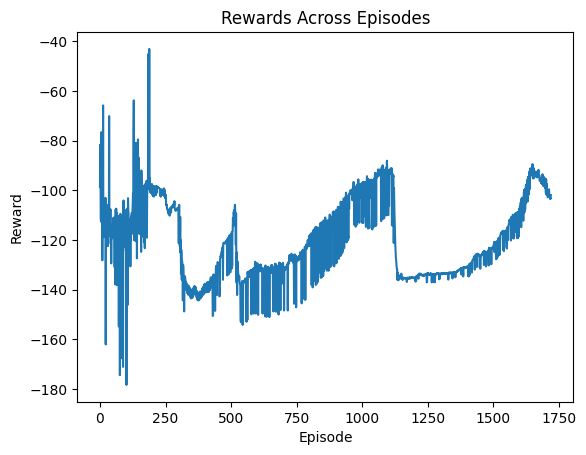

In [10]:
plot_rewards(a2c_agent.reward_across_episdoes)

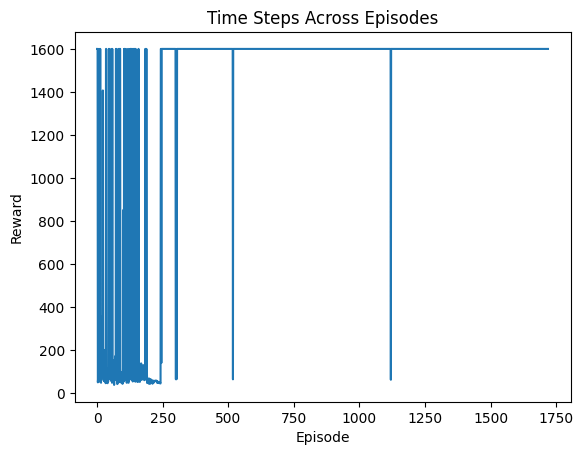

In [8]:
plt.plot(a2c_agent.timesteps_across_episodes)
plt.xlabel('Episode')
plt.ylabel('Reward')
plt.title('Time Steps Across Episodes')
plt.show()

### Evaluation

In [12]:
eval_rewards, eval_timesteps = a2c_agent.evaluate(100, 1600)

Evaluation::   0%|          | 0/100 [00:00<?, ?it/s]

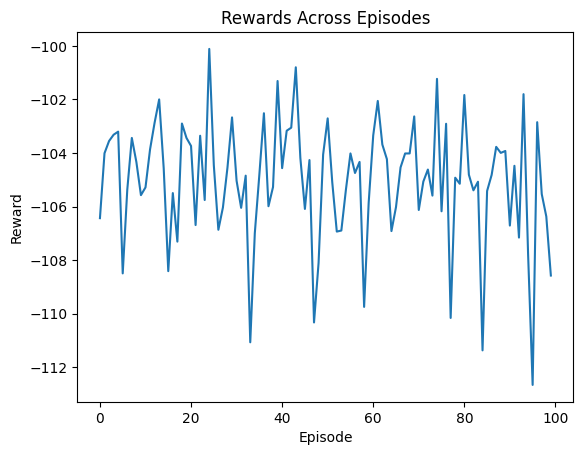

In [13]:
plot_rewards(eval_rewards)

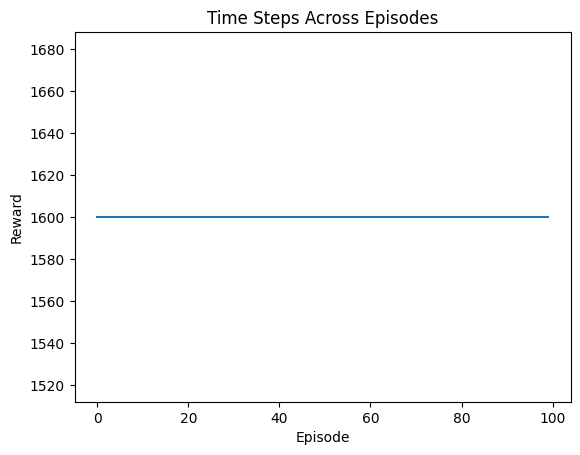

In [3]:
plt.plot(eval_timesteps)
plt.xlabel('Episode')
plt.ylabel('Reward')
plt.title('Time Steps Across Episodes')
plt.show()